In [1]:
# imports
import sys
print(sys.executable)
print(sys.version)
%matplotlib notebook
import matplotlib.pylab as pl
import numpy as np
from srwl_uti_opt import *
from scipy.optimize import curve_fit
import barc4plots as b4pt 
from IPython import display

C:\Users\anhe\AppData\Local\Continuum\anaconda3\python.exe
3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]


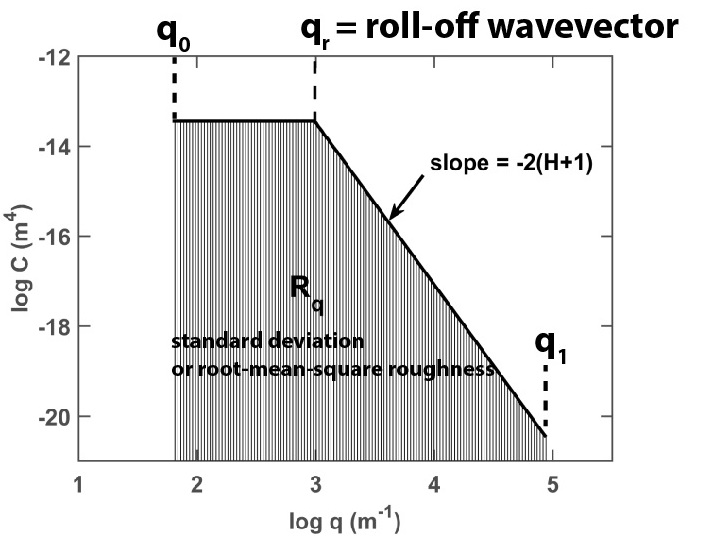

In [2]:
display.Image("./matlab_psd_codes/PSD.jpg")

### Generate 2D PSD from parameters

In [3]:
sigma = 3e-6
exponent = -3.6
PixelWidth = 1e-6
m = 2048
n = 2048
Cq, qy, qx = srw_uti_mtrl_Param_psd2D(sigma,
                                      exponent,
                                      PixelWidth,
                                      m , n,
                                      qr=0,     # roll off frequency
                                      C=None)   # it is possible to add a pre calculated PSD as long as it has the 
                                                       # same shape as Cq and qx and qy are on the same scale


<IPython.core.display.Javascript object>


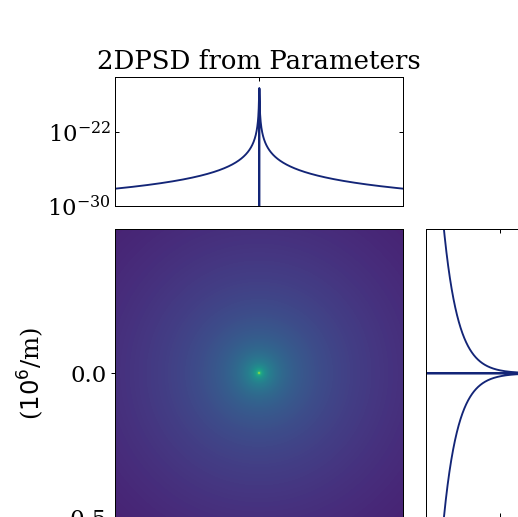

In [4]:
image = b4pt.Image2Plot(Cq, qx*1e-6, qy*1e-6)
image.legends = ['2DPSD from Parameters', '($10^6$/m)', '($10^6$/m)']
image.Colorbar = True
image.LaTex = True
image.AspectRatio = True
image.ColorScheme = 7
image.FontsSizeScale = 1.3
image.Scale=1
image.plt_limits = [1e-30, 1e-16]
image.sort_class()
b4pt.plot_2D_cuts(image, Enable=True, Silent=False)

### Generate the profile from 2D PSD

In [5]:
surf, axis_y, axis_x = srw_uti_mtrl_psd2D_Prof(Cq,
                                             qx,
                                             qy,
                                             symmetry=True,
                                             dist=1,   # 0 - uniform; 1 Gaussian phase random distribution
                                             seed=17)  # seed for random phase

<IPython.core.display.Javascript object>


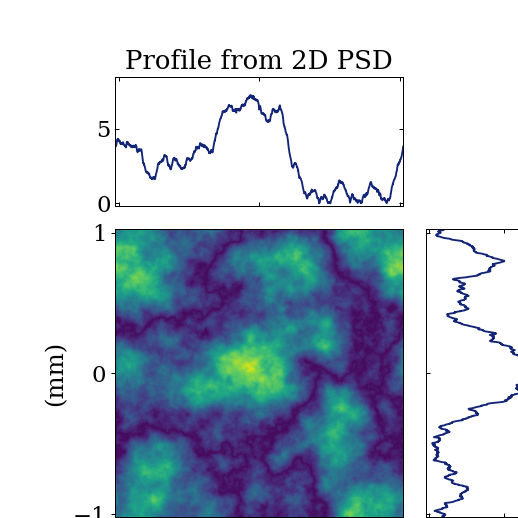

In [6]:
image = b4pt.Image2Plot(surf*1e6, axis_x*1e3, axis_y*1e3)
image.legends = ['Profile from 2D PSD', '(mm)', '(mm)']
image.Colorbar = True
image.LaTex = True
image.AspectRatio = True
image.ColorScheme = 7
image.FontsSizeScale = 1.3
image.plt_limits = [-0.2, np.amax(surf*1e6)*1.05]
image.sort_class()
b4pt.plot_2D_cuts(image, Enable=True, Silent=False)

### Generate Profile from Parameters

In [7]:
sigma = 3e-6
exponent = -3.6
PixelWidth = 1e-6
m = 2048
n = 2048
surf, axis_y, axis_x = srw_uti_mtrl_Param_Prof(sigma,
                                      exponent,
                                      PixelWidth,
                                      m , n,
                                      qr=0,     # roll off frequency
                                      C=None)   # it is possible to add a pre calculated PSD as long as it has the 
                                                       # same shape as Cq and qx and qy are on the same scale
lower_f_limit = 1/axis_x[-1]
upper_f_limit = 1/PixelWidth

cuty = surf[:, int(m/2)]
#psf_y, fy = srw_uti_mtrl_psd_1D(cuty, axis_y, positive_side=True)
rms = np.sqrt(np.mean(surf**2))*1e6
print('rms value: %.3f um'%rms)

rms value: 3.000 um


<IPython.core.display.Javascript object>


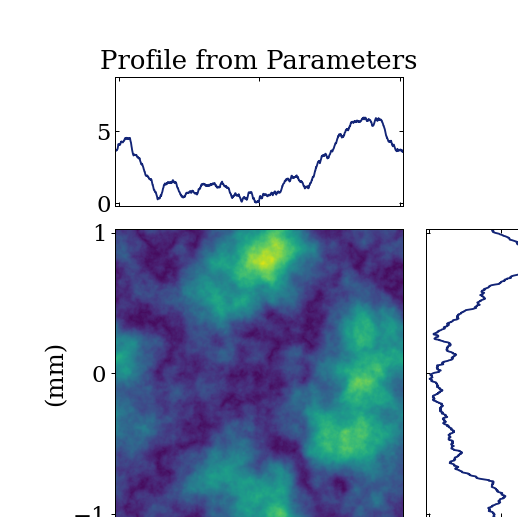

In [8]:
image = b4pt.Image2Plot(surf*1e6, axis_x*1e3, axis_y*1e3)
image.legends = ['Profile from Parameters', '(mm)', '(mm)']
image.Colorbar = True
image.LaTex = True
image.AspectRatio = True
image.ColorScheme = 7
image.FontsSizeScale = 1.3
image.plt_limits = [-0.2, np.amax(surf*1e6)*1.05]
image.sort_class()
b4pt.plot_2D_cuts(image, Enable=True, Silent=False)

<IPython.core.display.Javascript object>


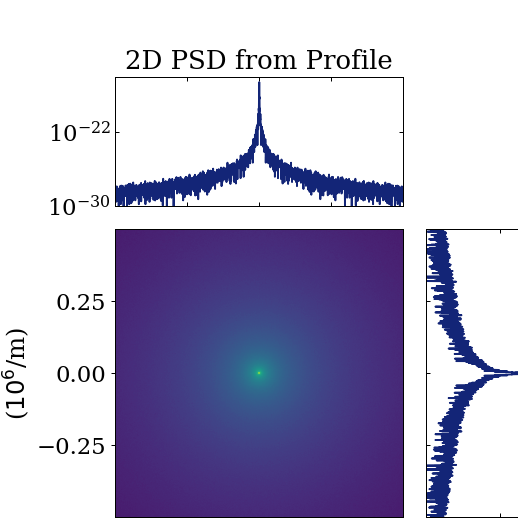

In [9]:
# 2D PSD calculation
psd_2d, fxbis, fybis = srw_uti_mtrl_Prof_psd2D(surf, axis_x, axis_y, pad=False)
cut_x_psd_2d = psd_2d[int(n/2), :]
cut_x_psd_2d = cut_x_psd_2d[fxbis>0]
axis_x_psd_2d = fxbis[fxbis>0]

image = b4pt.Image2Plot(psd_2d, fxbis*1e-6, fybis*1e-6)
image.legends = ['2D PSD from Profile', '($10^6$/m)', '($10^6$/m)']
image.Colorbar = True
image.LaTex = True
image.AspectRatio = True
image.ColorScheme = 7
image.FontsSizeScale = 1.3
image.Scale=1
image.plt_limits = [1e-30, 1e-16]
image.sort_class()
b4pt.plot_2D_cuts(image, Enable=True, Silent=False)

In [10]:
 # 1D PSD calculation of a profile cut
cutx = surf[int(n/2), :]
psf_x, fx = srw_uti_mtrl_Prof_psd1D(cutx, axis_x, positive_side=True)

# azimuthally averaged PSD from a 2D PSF calculation
psf_avg, f_avg = srw_uti_mtrl_Prof_psd_avg(surf, axis_x, axis_y, pad=False)

# input PSD cuts
cut_x_Cq = Cq[int(n/2), :]
cut_x_Cq = cut_x_Cq[qx>0]
axis_x_Cq = qx[qx>0]

<IPython.core.display.Javascript object>


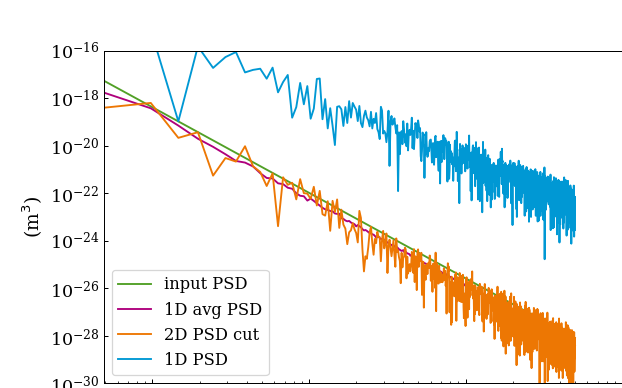

In [11]:
image = b4pt.Image2Plot(cut_x_Cq, axis_x_Cq)
image.AspectRatio = False
image.LaTex = True
image.legends = ['', 'spatial frequency (m$^{-1}$)', '(m$^3$)']
image.Scale = 3
image.ColorScheme = 1
image.label = 'input PSD'
image.grid = True 
image.sort_class()
b4pt.plot_1D(image, Enable=False, Hold=False)

image.image =  psf_avg
image.x = f_avg
image.ColorScheme = 2
image.label = '1D avg PSD'
b4pt.plot_1D(image, Enable=False, Hold=True)

image.image = cut_x_psd_2d
image.x = axis_x_psd_2d
image.ColorScheme = 3
image.label = '2D PSD cut'
b4pt.plot_1D(image, Enable=False, Hold=True)

image.image = psf_x
image.x = fx
image.ColorScheme = 4
image.label = '1D PSD'
image.ax_limits = [lower_f_limit*0.5, upper_f_limit, 1e-30, 1e-16]
b4pt.plot_1D(image, Enable=True, Hold=True)